#Utility Functions

In [2]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 660 kB/s 


In [3]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

In [5]:
import numpy as np
def getCols(df):
  all=list(df)
  df2=df.dropna()
  all.remove('Class')
  num_cols=[]
  for i in all:
    if len(np.unique(df2[i]))>50:
      num_cols.append(i)
  bin_cols=[]
  bin_cols = [col for col in df2 if np.isin(df2[col].unique(), [0, 1]).all()]
  cat_cols=[]
  for i in all:
    if i not in num_cols and i not in bin_cols and i!='Class':
      cat_cols.append(i)
  if 'Class' in bin_cols:
    bin_cols.remove('Class')
  return [num_cols,cat_cols,bin_cols]

In [6]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss, roc_curve,confusion_matrix, auc
def metrics(cm):
        TN, FP, FN, TP = cm.ravel()
        precision =(TP)/(TP+FP)
        accuracy_model  =(TP+TN)/(TP+TN+FP+FN)
        recall_score  =(TP)/(TP+FN)
        specificity_value =(TN)/(TN + FP)
        
        False_positive_rate =(FP)/(FP+TN)
        False_negative_rate =(FN)/(FN+TP)
        f1_score =2*(( precision * recall_score)/( precision + recall_score))
        PPV=(TP)/(TP+FP)
        NPV=TN / (TN + FN) 
        print("PPV: ",PPV*100)
        print("NPV: ",NPV*100)
        print("Precision value of the model: ",precision*100)
        print("Accuracy of the model: ",accuracy_model*100)
        print("Recall of the model: ",recall_score*100)
        print("Specificity of the model: ",specificity_value*100)
        print("F1 Score of the model: ",f1_score*100)

# ICU DELIRIUM MIMIC DATASET

## CatBoost

In [8]:
df=pd.read_csv('/content/delirium_icu_tr_mimic_.csv')
test=pd.read_csv('/content/delirium_icu_ts_mimic.csv')
num_cols,cat_cols,bin_cols=getCols(df)
train_data=df.drop('Class',axis=1)
train_labels=df['Class']
test_data=test.drop('Class',axis=1)
test_labels=test['Class']
train_data,val_data,train_labels,val_labels=train_test_split(train_data,train_labels,stratify=train_labels,random_state=11,test_size=0.1,shuffle=True)

In [9]:
df.head()

,ALT,AST,Admission Weight (Kg),Albumin,Anion gap,Arterial Base Excess,Arterial Blood Pressure Mean,Arterial CO2,Arterial PaCO2,Arterial pH,...,Admission Type,Admission Location,Insurance,Language,Religion,Marital Status,Ethnicity,Gender,Age,Class
0,25.666667,77.000000,73.777055,2.950000,13.226413,0.534483,74.230570,26.051724,40.422414,7.400342,...,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Private,ENGL,EPISCOPALIAN,MARRIED,WHITE,M,63.178082,0
1,27.750000,41.000000,79.876167,1.925000,13.167512,3.260000,59.571885,29.640000,45.020000,7.410200,...,URGENT,TRANSFER FROM HOSP/EXTRAM,Private,ENGL,CATHOLIC,MARRIED,WHITE,M,53.805479,0
2,1084.977273,2380.916996,72.008629,2.715033,12.880346,0.535714,87.937727,25.482143,38.511364,7.412403,...,EMERGENCY,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,NOT SPECIFIED,SINGLE,WHITE,M,50.260274,1
3,25.500000,36.000000,78.602700,3.700000,13.199486,1.088235,78.837134,26.058824,37.323529,7.442553,...,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,RUSS,NOT SPECIFIED,MARRIED,WHITE,M,56.493151,0
4,317.207407,812.911111,76.556766,2.777419,13.723353,-0.797357,100.200931,23.159292,33.132159,7.429607,...,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,ENGL,CATHOLIC,SEPARATED,WHITE,F,41.293151,0


In [10]:
num_cols

['ALT',
 'AST',
 'Admission Weight (Kg)',
 'Albumin',
 'Anion gap',
 'Arterial Base Excess',
 'Arterial Blood Pressure Mean',
 'Arterial CO2',
 'Arterial PaCO2',
 'Arterial pH',
 'BUN',
 'Braden Score',
 'Calcium Non-ionized',
 'Central Venous Pressure',
 'Chloride (serum)',
 'Creatinine',
 'Differential-Basos',
 'Differential-Eos',
 'Differential-Lymphs',
 'Differential-Monos',
 'GCS Eye Opening',
 'FiO2 Set',
 'Fingerstick Glucose',
 'GCS Total',
 'HCO3 (serum)',
 'Heart Rate',
 'Hematocrit (whole blood)',
 'Hemoglobin',
 'High Respiratory Rate',
 'INR',
 'Inspired O2 Fraction',
 'Ionized Calcium',
 'LDH',
 'Lactic Acid',
 'Low Exhaled Min Vol',
 'Magnesium',
 'Mean Airway Pressure',
 'Minute Volume',
 'Motor Response',
 'Non Invasive Blood Pressure Mean',
 'O2 Flow',
 'O2 saturation pulseoxymetry',
 'PEEP',
 'PTT',
 'Peak Inspiratory Pressure',
 'Phosphorous',
 'Plateau Pressure',
 'Platelet Count',
 'Potassium (whole blood)',
 'Pressure Support',
 'Prothrombin time',
 'Resp Rate (S

In [11]:
cat_cols

['Admission Type',
 'Admission Location',
 'Insurance',
 'Language',
 'Religion',
 'Marital Status',
 'Ethnicity',
 'Gender']

In [12]:
bin_cols

[]

In [13]:
cat_features=[]
for i in range(0,len(list(train_data))):
  if list(train_data)[i] in cat_cols or list(train_data)[i] in bin_cols:
    cat_features.append(i)

from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(train_data, train_labels, cat_features, eval_set=(val_data,val_labels))


Learning rate set to 0.043781
0:	learn: 0.6579572	test: 0.6584716	best: 0.6584716 (0)	total: 71.6ms	remaining: 1m 11s
1:	learn: 0.6240848	test: 0.6250798	best: 0.6250798 (1)	total: 93.2ms	remaining: 46.5s
2:	learn: 0.5926449	test: 0.5931201	best: 0.5931201 (2)	total: 114ms	remaining: 37.9s
3:	learn: 0.5658156	test: 0.5663505	best: 0.5663505 (3)	total: 140ms	remaining: 34.8s
4:	learn: 0.5406147	test: 0.5428410	best: 0.5428410 (4)	total: 161ms	remaining: 32s
5:	learn: 0.5175067	test: 0.5211045	best: 0.5211045 (5)	total: 190ms	remaining: 31.4s
6:	learn: 0.4969687	test: 0.5017804	best: 0.5017804 (6)	total: 214ms	remaining: 30.4s
7:	learn: 0.4780265	test: 0.4832620	best: 0.4832620 (7)	total: 236ms	remaining: 29.2s
8:	learn: 0.4630240	test: 0.4683117	best: 0.4683117 (8)	total: 257ms	remaining: 28.3s
9:	learn: 0.4474521	test: 0.4545021	best: 0.4545021 (9)	total: 286ms	remaining: 28.3s
10:	learn: 0.4334671	test: 0.4423595	best: 0.4423595 (10)	total: 308ms	remaining: 27.7s
11:	learn: 0.4187747	

In [14]:
preds_class = model.predict(test_data)
preds_proba = model.predict_proba(test_data)
prob=[] # raw data
for i in preds_proba:
  prob.append(i[1])

from sklearn.metrics import roc_auc_score
print('ROC_AUC: '+str(roc_auc_score(test_labels,prob)))
from sklearn.metrics import log_loss, roc_curve,confusion_matrix, auc
cm=confusion_matrix(test_labels,preds_class)
metrics(cm)

ROC_AUC: 0.9738714311213864
PPV:  88.79056047197639
NPV:  93.91304347826087
Precision value of the model:  88.79056047197639
Accuracy of the model:  92.22546161321672
Recall of the model:  87.75510204081633
Specificity of the model:  94.46064139941691
F1 Score of the model:  88.26979472140762


In [15]:
df=pd.read_csv('/content/delirium_icu_tr_mimic_encoded.csv')
test=pd.read_csv('/content/delirium_icu_ts_mimic_encoded.csv')
num_cols,cat_cols,bin_cols=getCols(df)
train_data=df.drop('Class',axis=1)
train_labels=df['Class']
test_data=test.drop('Class',axis=1)
test_labels=test['Class']
train_data,val_data,train_labels,val_labels=train_test_split(train_data,train_labels,stratify=train_labels,random_state=11,test_size=0.1,shuffle=True)

In [16]:
df.head()

,ALT,AST,Admission Weight (Kg),Albumin,Anion gap,Arterial Base Excess,Arterial Blood Pressure mean,Arterial CO2(Calc),Arterial PaCO2,Arterial pH,...,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,AGE,Class
0,25.666667,77.000000,73.777055,2.950000,13.226413,0.534483,74.230570,26.051724,40.422414,7.400342,...,0,2,3,17,5,2,25,1,63.178082,0
1,27.750000,41.000000,79.876167,1.925000,13.167512,3.260000,59.571885,29.640000,45.020000,7.410200,...,2,3,3,17,3,2,25,1,53.805479,0
2,1084.977273,2380.916996,72.008629,2.715033,12.880346,0.535714,87.937727,25.482143,38.511364,7.412403,...,1,2,2,17,12,4,25,1,50.260274,1
3,25.500000,36.000000,78.602700,3.700000,13.199486,1.088235,78.837134,26.058824,37.323529,7.442553,...,1,0,3,29,12,2,25,1,56.493151,0
4,317.207407,812.911111,76.556766,2.777419,13.723353,-0.797357,100.200931,23.159292,33.132159,7.429607,...,1,3,3,17,3,3,25,0,41.293151,0


In [17]:
cat_cols

['ADMISSION_TYPE',
 'ADMISSION_LOCATION',
 'INSURANCE',
 'LANGUAGE',
 'RELIGION',
 'MARITAL_STATUS',
 'ETHNICITY']

In [18]:
bin_cols

['GENDER']

In [19]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(train_data, train_labels, eval_set=(val_data,val_labels))


Learning rate set to 0.043781
0:	learn: 0.6565834	test: 0.6575778	best: 0.6575778 (0)	total: 18.4ms	remaining: 18.4s
1:	learn: 0.6243344	test: 0.6249666	best: 0.6249666 (1)	total: 33.8ms	remaining: 16.9s
2:	learn: 0.5954783	test: 0.5960905	best: 0.5960905 (2)	total: 49.3ms	remaining: 16.4s
3:	learn: 0.5652460	test: 0.5680043	best: 0.5680043 (3)	total: 64.7ms	remaining: 16.1s
4:	learn: 0.5376487	test: 0.5407736	best: 0.5407736 (4)	total: 90.4ms	remaining: 18s
5:	learn: 0.5165926	test: 0.5195630	best: 0.5195630 (5)	total: 106ms	remaining: 17.6s
6:	learn: 0.4970550	test: 0.5005793	best: 0.5005793 (6)	total: 122ms	remaining: 17.3s
7:	learn: 0.4788856	test: 0.4834880	best: 0.4834880 (7)	total: 137ms	remaining: 17s
8:	learn: 0.4629249	test: 0.4677447	best: 0.4677447 (8)	total: 153ms	remaining: 16.8s
9:	learn: 0.4484720	test: 0.4534810	best: 0.4534810 (9)	total: 176ms	remaining: 17.4s
10:	learn: 0.4364238	test: 0.4417780	best: 0.4417780 (10)	total: 195ms	remaining: 17.5s
11:	learn: 0.4220064	

In [20]:
preds_class = model.predict(test_data)
preds_proba = model.predict_proba(test_data)
prob=[] # encoded data
for i in preds_proba:
  prob.append(i[1])

from sklearn.metrics import roc_auc_score
print('ROC_AUC: '+str(roc_auc_score(test_labels,prob)))
from sklearn.metrics import log_loss, roc_curve,confusion_matrix, auc
cm=confusion_matrix(test_labels,preds_class)
metrics(cm)

ROC_AUC: 0.9729491963382604
PPV:  89.0909090909091
NPV:  92.98998569384835
Precision value of the model:  89.0909090909091
Accuracy of the model:  91.73955296404276
Recall of the model:  85.71428571428571
Specificity of the model:  94.75218658892129
F1 Score of the model:  87.36998514115899


75% missingness threshold

In [ ]:
preds_class = model.predict(test_data)
preds_proba = model.predict_proba(test_data)

In [ ]:
prob=[] # raw data
for i in preds_proba:
  prob.append(i[1])

from sklearn.metrics import roc_auc_score
print('ROC_AUC: '+str(roc_auc_score(test_labels,prob)))
from sklearn.metrics import log_loss, roc_curve,confusion_matrix, auc
cm=confusion_matrix(test_labels,preds_class)
metrics(cm)

ROC_AUC: 0.970964479086095
PPV:  87.86982248520711
NPV:  93.34298118668596
Precision value of the model:  87.86982248520711
Accuracy of the model:  91.54518950437318
Recall of the model:  86.58892128279884
Specificity of the model:  94.02332361516035
F1 Score of the model:  87.22466960352423


In [ ]:
prob=[] #with ordinal encoding only
for i in preds_proba:
  prob.append(i[1])

from sklearn.metrics import roc_auc_score
print('ROC_AUC: '+str(roc_auc_score(test_labels,prob)))
from sklearn.metrics import log_loss, roc_curve,confusion_matrix, auc
cm=confusion_matrix(test_labels,preds_class)
metrics(cm)

ROC_AUC: 0.9694090047514216
PPV:  87.72455089820359
NPV:  92.80575539568345
Precision value of the model:  87.72455089820359
Accuracy of the model:  91.15646258503402
Recall of the model:  85.42274052478133
Specificity of the model:  94.02332361516035
F1 Score of the model:  86.55834564254062


In [ ]:
prob=[] #with scaling of numerical variables
for i in preds_proba:
  prob.append(i[1])

from sklearn.metrics import roc_auc_score
print('ROC_AUC: '+str(roc_auc_score(test_labels,prob)))
from sklearn.metrics import log_loss, roc_curve,confusion_matrix, auc
cm=confusion_matrix(test_labels,preds_class)
metrics(cm)

ROC_AUC: 0.5857678348307254
PPV:  42.857142857142854
NPV:  68.52497096399536
Precision value of the model:  42.857142857142854
Accuracy of the model:  64.33430515063168
Recall of the model:  20.99125364431487
Specificity of the model:  86.0058309037901
F1 Score of the model:  28.180039138943247


35 missingness threshold

In [ ]:
prob=[] #35 missing values percentage threshold - raw data
for i in preds_proba:
  prob.append(i[1])

from sklearn.metrics import roc_auc_score
print('ROC_AUC: '+str(roc_auc_score(test_labels,prob)))
from sklearn.metrics import log_loss, roc_curve,confusion_matrix, auc
cm=confusion_matrix(test_labels,preds_class)
metrics(cm)

ROC_AUC: 0.9329212317996752
PPV:  87.41935483870968
NPV:  89.98609179415855
Precision value of the model:  87.41935483870968
Accuracy of the model:  89.21282798833819
Recall of the model:  79.00874635568513
Specificity of the model:  94.31486880466473
F1 Score of the model:  83.00153139356816


## XGBoost

In [21]:
df=pd.read_csv('/content/delirium_icu_tr_mimic_encoded.csv')
X=df.drop('Class',axis=1)
y=df['Class']

In [23]:
df_test=pd.read_csv('/content/delirium_icu_ts_mimic_encoded.csv')
X_test=df_test.drop('Class',axis=1)
y_test=df_test['Class']

In [22]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [24]:
xgb.fit(X,y)

preds = xgb.predict(test_data)

In [25]:
preds_class = xgb.predict(test_data)
preds_proba = xgb.predict_proba(test_data)
prob=[]   
for i in preds_proba:
  prob.append(i[1])

from sklearn.metrics import roc_auc_score
print('ROC_AUC: '+str(roc_auc_score(test_labels,prob)))
from sklearn.metrics import log_loss, roc_curve,confusion_matrix, auc
cm=confusion_matrix(test_labels,preds_class)
metrics(cm)

ROC_AUC: 0.9656138173720135
PPV:  88.44984802431611
NPV:  92.57142857142857
Precision value of the model:  88.44984802431611
Accuracy of the model:  91.25364431486881
Recall of the model:  84.8396501457726
Specificity of the model:  94.46064139941691
F1 Score of the model:  86.60714285714285


In [14]:
# 75 scaled & encoded
preds_class = xgb.predict(X_test)
preds_proba = xgb.predict_proba(X_test)
prob=[] 
for i in preds_proba:
  prob.append(i[1])

from sklearn.metrics import roc_auc_score
print('ROC_AUC: '+str(roc_auc_score(y_test,prob)))
from sklearn.metrics import log_loss, roc_curve,confusion_matrix, auc
cm=confusion_matrix(y_test,preds_class)
metrics(cm)

ROC_AUC: 0.6167646983824767
PPV:  38.283378746594
NPV:  78.98305084745762
Precision value of the model:  38.283378746594
Accuracy of the model:  49.9514091350826
Recall of the model:  81.92419825072886
Specificity of the model:  33.965014577259474
F1 Score of the model:  52.1819870009285


#NON-ICU DELIRIUM AUBMC DATASET

In [30]:
df=pd.read_csv('/content/aubmc_train_downsampled_enc.csv')
test=pd.read_csv('/content/aubmc_test_enc.csv')
train_data=df.drop('Class',axis=1)
train_labels=df['Class']
test_data=test.drop('Class',axis=1)
test_labels=test['Class']

In [12]:
classest=test['Class']
classes=df['Class']

class_tr=[]
for i in classes:
  if i=='possible' or i=='confirmed':
    class_tr.append(1)
  else:
    class_tr.append(0)

class_ts=[]
for i in classest:
  if i=='possible' or i=='confirmed':
    class_ts.append(1)
  else:
    class_ts.append(0)

test['Class']=class_ts
df['Class']=class_tr

In [13]:
df.to_csv('aubmc_train_56thresh.csv')
test.to_csv('aubmc_test_56thresh.csv')

In [31]:
train_data=df.drop('Class',axis=1)
train_labels=df['Class']
test_data=test.drop('Class',axis=1)
test_labels=test['Class']

In [7]:
import category_encoders as ce

In [7]:
df.columns #75% threshold

Index(['Unnamed: 0', 'BP_SYSTOLIC', 'BP_DIASTOLIC', 'TEMPERATURE', 'PULSE',
       'WEIGHT', 'HEIGHT', 'RESPIRATIONS', 'BMI', 'BSA', '325', '2401', '2405',
       '8428', '9637', '9639', '10608', '112703', '169448', '169449', '169861',
       '175233', '182878', '186252', '192673', '400051', '400562', '400580',
       '40802017', 'TOBACCO_TYPE', 'CIGARETTES_YN', 'PIPES_YN', 'CIGARS_YN',
       'ALCOHOL_USE', 'ADD_LINE_1', 'NATIONALITY', 'SEX_C',
       'Rest_due_to_violence', 'Use_of_rest', 'agitation', 'parkinson',
       'alzeihmer', 'depression', 'ocd', 'anxiety', 'bipolar', 'abuse',
       'antipsychotics', 'lithium', 'cancer', 'LOS', 'Age', 'Class'],
      dtype='object')

In [17]:
num_cols,cat_cols,bin_cols=getCols(df)

In [50]:
cat_cols=[
 '325',
 '2401',
 '2405',
 '9637',
 '10608',
 '169448',
 '169449',
 '175233',
 'ADD_LINE_1',
 '182878',
 '40802017',
 'TOBACCO_TYPE',
 'CIGARETTES_YN',
 'PIPES_YN',
 'CIGARS_YN',
 'ALCOHOL_USE',
 'NATIONALITY',
 'SEX_C']

In [32]:
train_data,val_data,train_labels,val_labels=train_test_split(train_data,train_labels,stratify=train_labels,random_state=11,test_size=0.1,shuffle=True)

In [33]:
cat_cols=['ADD_LINE_1',
          '325',
          '2401',
          '2405',
          '8428',
          '9637',
          '10608',
          '169448',
          '169449',
          '175233',
          '182878',
          '40802017',
          'NATIONALITY',
          'SEX_C']

In [34]:
train_data

,BP_SYSTOLIC,BP_DIASTOLIC,TEMPERATURE,PULSE,WEIGHT,HEIGHT,RESPIRATIONS,BMI,BSA,325,...,depression,ocd,anxiety,bipolar,abuse,antipsychotics,lithium,cancer,LOS,Age
965,132.0,87.0,97.7,81.0,86.000575,1.569999,16.0,34.890000,1.940000,0,...,0,0,0,0,0,0,0,0,1,49.4
727,130.0,60.0,98.8,62.0,98.000563,1.589989,14.0,38.760000,2.080000,0,...,0,0,0,0,0,0,0,0,7,67.4
839,121.0,85.0,97.9,95.0,72.000495,1.759991,18.0,23.240000,1.880000,0,...,0,0,0,0,0,0,0,0,6,53.5
27,57.0,42.0,97.2,63.0,69.000498,1.499997,0.0,30.670000,1.700000,0,...,0,0,0,0,0,0,0,0,35,87.5
892,144.0,89.0,97.9,65.0,84.000483,1.750009,20.0,27.430000,2.020000,1,...,0,0,0,0,0,0,0,0,5,86.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,125.0,77.0,98.0,84.0,67.500500,1.499997,16.0,30.000000,1.680000,0,...,0,0,0,0,0,0,0,0,48,61.0
548,177.0,94.0,97.7,72.0,77.600795,1.658397,18.0,27.048705,1.873885,0,...,0,0,0,0,0,0,0,0,2,54.4
503,150.0,92.0,98.1,74.0,56.000322,1.559992,16.0,23.010000,1.560000,0,...,0,0,0,0,0,0,0,0,11,92.5
850,141.0,66.0,97.3,62.0,77.500395,1.729994,16.0,25.890000,1.930000,0,...,0,0,0,0,0,0,0,0,9,89.1


In [52]:
cat_features=[]
for i in range(0,len(list(train_data))):
  if list(train_data)[i] in cat_cols: #or list(train_data)[i] in bin_cols:
    cat_features.append(i)

from catboost import CatBoostClassifier
model = CatBoostClassifier()
# Fit model
model.fit(train_data, train_labels,cat_features=cat_features,eval_set=(val_data,val_labels))


Learning rate set to 0.02665
0:	learn: 0.6815150	test: 0.6826246	best: 0.6826246 (0)	total: 6.23ms	remaining: 6.22s
1:	learn: 0.6678456	test: 0.6723374	best: 0.6723374 (1)	total: 16.8ms	remaining: 8.36s
2:	learn: 0.6584462	test: 0.6621748	best: 0.6621748 (2)	total: 21.2ms	remaining: 7.04s
3:	learn: 0.6463342	test: 0.6516301	best: 0.6516301 (3)	total: 32.8ms	remaining: 8.16s
4:	learn: 0.6382411	test: 0.6451419	best: 0.6451419 (4)	total: 37.4ms	remaining: 7.44s
5:	learn: 0.6295098	test: 0.6369949	best: 0.6369949 (5)	total: 48.6ms	remaining: 8.05s
6:	learn: 0.6229097	test: 0.6308916	best: 0.6308916 (6)	total: 60.4ms	remaining: 8.56s
7:	learn: 0.6132996	test: 0.6204888	best: 0.6204888 (7)	total: 71.6ms	remaining: 8.88s
8:	learn: 0.6109502	test: 0.6186717	best: 0.6186717 (8)	total: 74.9ms	remaining: 8.25s
9:	learn: 0.5998464	test: 0.6078304	best: 0.6078304 (9)	total: 86.1ms	remaining: 8.52s
10:	learn: 0.5933166	test: 0.6022244	best: 0.6022244 (10)	total: 97ms	remaining: 8.72s
11:	learn: 0.5

In [16]:
preds_class = model.predict(test_data)
preds_proba = model.predict_proba(test_data)
prob=[] #AUBMC --> ENCODED 
for i in preds_proba:
  prob.append(i[1])

from sklearn.metrics import roc_auc_score
print('ROC_AUC: '+str(100*roc_auc_score(test_labels,prob)))
from sklearn.metrics import log_loss, roc_curve,confusion_matrix, auc
cm=confusion_matrix(test_labels,preds_class)
metrics(cm)

ROC_AUC: 85.86580412216037
PPV:  47.61904761904761
NPV:  94.11764705882352
Precision value of the model:  47.61904761904761
Accuracy of the model:  85.37313432835822
Recall of the model:  65.21739130434783
Specificity of the model:  88.58131487889274
F1 Score of the model:  55.04587155963303


In [28]:
cat_features=[]
for i in range(0,len(list(train_data))):
  if list(train_data)[i] in cat_cols:
    cat_features.append(i)

from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(train_data, train_labels, cat_features=cat_features,eval_set=(val_data,val_labels))


Learning rate set to 0.02665
0:	learn: 0.6815150	test: 0.6826246	best: 0.6826246 (0)	total: 6.14ms	remaining: 6.13s
1:	learn: 0.6678456	test: 0.6723374	best: 0.6723374 (1)	total: 18.2ms	remaining: 9.08s
2:	learn: 0.6584462	test: 0.6621748	best: 0.6621748 (2)	total: 23.1ms	remaining: 7.67s
3:	learn: 0.6463342	test: 0.6516301	best: 0.6516301 (3)	total: 39.1ms	remaining: 9.74s
4:	learn: 0.6382411	test: 0.6451419	best: 0.6451419 (4)	total: 43.9ms	remaining: 8.73s
5:	learn: 0.6295098	test: 0.6369949	best: 0.6369949 (5)	total: 57.1ms	remaining: 9.46s
6:	learn: 0.6229097	test: 0.6308916	best: 0.6308916 (6)	total: 70.7ms	remaining: 10s
7:	learn: 0.6132996	test: 0.6204888	best: 0.6204888 (7)	total: 98ms	remaining: 12.2s
8:	learn: 0.6109502	test: 0.6186717	best: 0.6186717 (8)	total: 105ms	remaining: 11.6s
9:	learn: 0.5998464	test: 0.6078304	best: 0.6078304 (9)	total: 126ms	remaining: 12.5s
10:	learn: 0.5933166	test: 0.6022244	best: 0.6022244 (10)	total: 151ms	remaining: 13.6s
11:	learn: 0.587699

In [53]:
preds_class = model.predict(test_data)
preds_proba = model.predict_proba(test_data)
prob=[] #AUBMC --> RAW 
for i in preds_proba:
  prob.append(i[1])

from sklearn.metrics import roc_auc_score
print('ROC_AUC: '+str(100*roc_auc_score(test_labels,prob)))
from sklearn.metrics import log_loss, roc_curve,confusion_matrix, auc
cm=confusion_matrix(test_labels,preds_class)
metrics(cm)

ROC_AUC: 88.54370392658343
PPV:  50.0
NPV:  95.16728624535315
Precision value of the model:  50.0
Accuracy of the model:  86.26865671641791
Recall of the model:  71.73913043478261
Specificity of the model:  88.58131487889274
F1 Score of the model:  58.928571428571416


In [18]:
from xgboost import XGBClassifier #AUBMC -->-------- ENCODED
xgb = XGBClassifier()
xgb.fit(train_data,train_labels)

preds = xgb.predict(test_data)

preds_class = xgb.predict(test_data)
preds_proba = xgb.predict_proba(test_data)
prob=[]
for i in preds_proba:
  prob.append(i[1])

from sklearn.metrics import roc_auc_score
print('ROC_AUC: '+str(roc_auc_score(test_labels,prob)))
from sklearn.metrics import log_loss, roc_curve,confusion_matrix, auc
cm=confusion_matrix(test_labels,preds_class)
metrics(cm)

ROC_AUC: 0.8340604784113134
PPV:  39.02439024390244
NPV:  94.46640316205533
Precision value of the model:  39.02439024390244
Accuracy of the model:  80.8955223880597
Recall of the model:  69.56521739130434
Specificity of the model:  82.69896193771626
F1 Score of the model:  50.000000000000014


Text(0.5, 1.0, 'Feature Importance')

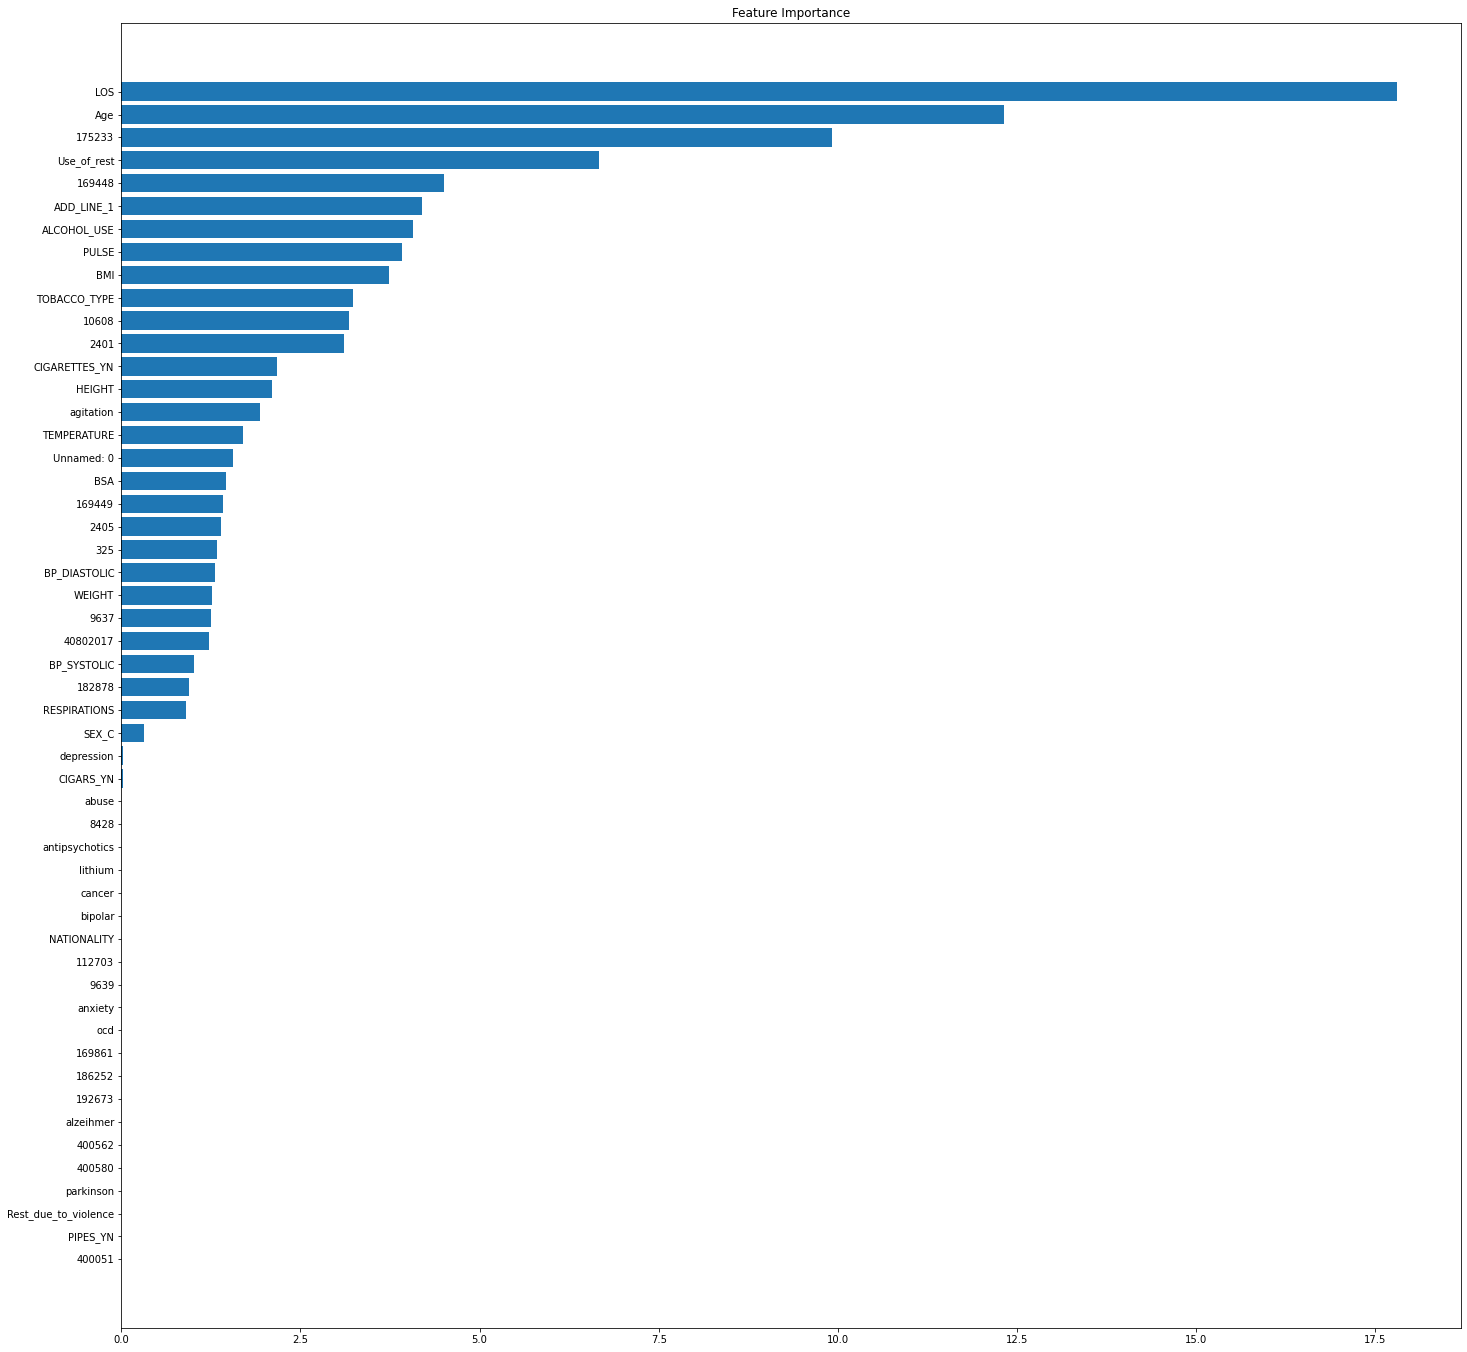

In [57]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error


feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(24, 24))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(val_data.columns)[sorted_idx])
plt.title('Feature Importance')


In [58]:
cols_to_drop=[]
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
for i in sorted_idx:
  print(np.array(val_data.columns)[i])
  print(feature_importance[i])
  if feature_importance[i]<0.1:
    cols_to_drop.append(np.array(val_data.columns)[i])

400051
0.0
PIPES_YN
0.0
Rest_due_to_violence
0.0
parkinson
0.0
400580
0.0
400562
0.0
alzeihmer
0.0
192673
0.0
186252
0.0
169861
0.0
ocd
0.0
anxiety
0.0
9639
0.0
112703
0.0
NATIONALITY
0.0
bipolar
0.0
cancer
0.0
lithium
0.0
antipsychotics
0.0
8428
0.0
abuse
0.0
CIGARS_YN
0.02335718641654886
depression
0.024747391529364653
SEX_C
0.3108133483414867
RESPIRATIONS
0.8986203192485079
182878
0.9395693880407824
BP_SYSTOLIC
1.0111412422250834
40802017
1.2172367047086745
9637
1.2561345439279221
WEIGHT
1.2689391896570523
BP_DIASTOLIC
1.3067163052951938
325
1.340763739848512
2405
1.3891649877060712
169449
1.4169922538713884
BSA
1.4647798724107413
Unnamed: 0
1.5532046661315642
TEMPERATURE
1.7048278544695532
agitation
1.9415530060195056
HEIGHT
2.10746449740141
CIGARETTES_YN
2.172581537679838
2401
3.1136551411709115
10608
3.1837734738621752
TOBACCO_TYPE
3.234787495764277
BMI
3.7326450635877926
PULSE
3.911379340107415
ALCOHOL_USE
4.0728817877950085
ADD_LINE_1
4.200048479040513
169448
4.499016296190936


In [63]:
df.drop(cols_to_drop,inplace=True,axis=1)
test.drop(cols_to_drop,inplace=True,axis=1)

In [64]:
df.to_csv('aubmc_train_downsampled_feat_enc.csv')
test.to_csv('aubmc_test_feat_enc.csv')